In [ ]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/negative/30377.jpg  
  inflating: images/validation/negative/30394.jpg  
  inflating: images/validation/negative/30410.jpg  
  inflating: images/validation/negative/30415.jpg  
  inflating: images/validation/negative/30420.jpg  
  inflating: images/validation/negative/30428.jpg  
  inflating: images/validation/negative/30439.jpg  
  inflating: images/validation/negative/30440.jpg  
  inflating: images/validation/negative/30456.jpg  
  inflating: images/validation/negative/30458.jpg  
  inflating: images/validation/negative/30460.jpg  
  inflating: images/validation/negative/30462.jpg  
  inflating: images/validation/negative/30482.jpg  
  inflating: images/validation/negative/30490.jpg  
  inflating: images/validation/negative/30499.jpg  
  inflating: images/validation/negative/30509.jpg  
  inflating: images/validation/negative/30535.jpg  
  inflating: images/validation/negative/30541.jpg  
  inflating: 


🔹 Processing train split...
Before balancing: {'negative': 13470, 'neutral': 8187, 'positive': 7164}
After balancing: {'negative': 7164, 'neutral': 7164, 'positive': 7164}

🔹 Processing validation split...
Before balancing: {'negative': 3228, 'neutral': 2013, 'positive': 1825}
After balancing: {'negative': 1825, 'neutral': 1825, 'positive': 1825}

✅ Balanced dataset created successfully at: /content/images_balanced


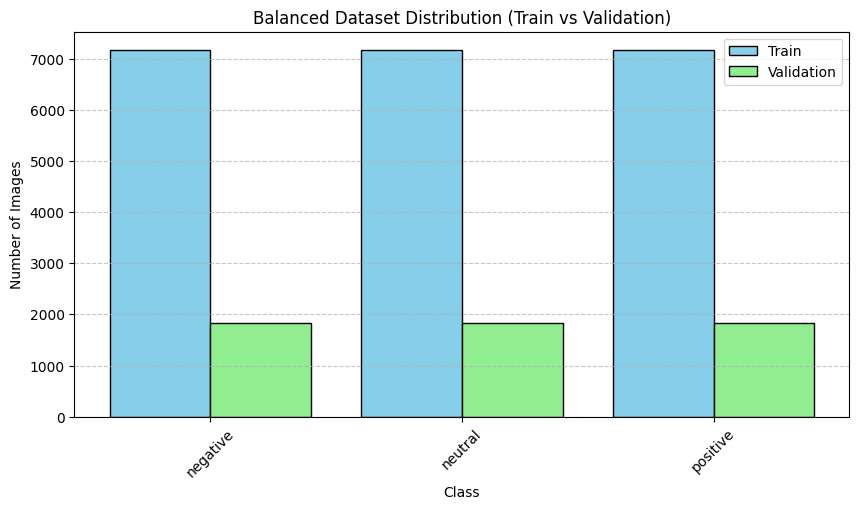

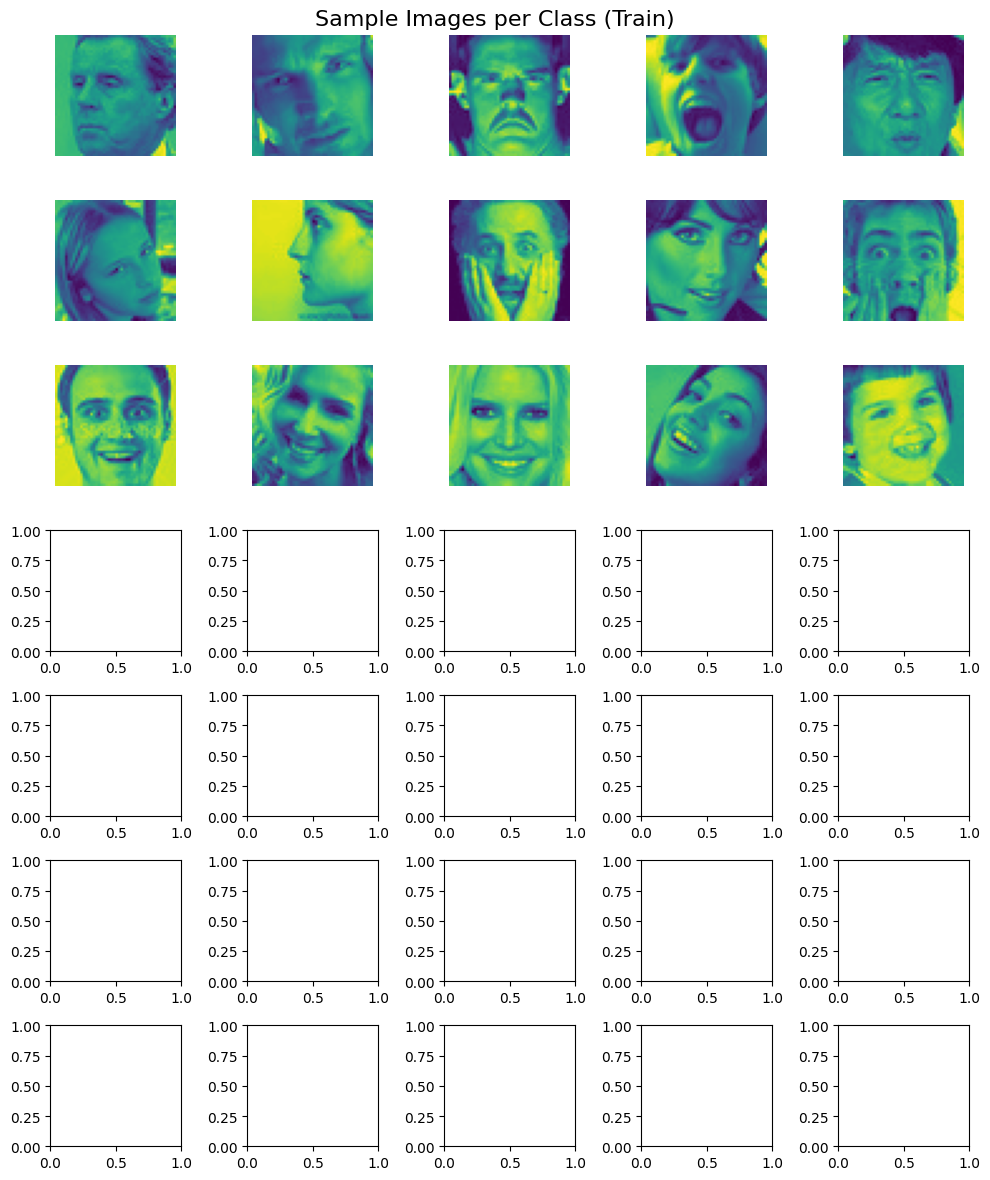

In [ ]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from glob import glob
from collections import Counter

# --- 📁 Paths ---
MASTER_DIR = '/content/images'
BALANCED_DIR = '/content/images_balanced'
SPLITS = ['train', 'validation']
CLASSES = ['negative', 'neutral', 'positive']

# --- ⚙️ Step 1: Create folder structure for balanced dataset ---
for split in SPLITS:
    for cls in CLASSES:
        os.makedirs(os.path.join(BALANCED_DIR, split, cls), exist_ok=True)

# --- ⚙️ Step 2: Balance each split separately ---
for split in SPLITS:
    print(f"\n🔹 Processing {split} split...")

    # Gather all images by class
    split_images = {cls: glob(os.path.join(MASTER_DIR, split, cls, '*')) for cls in CLASSES}

    # Count per class
    class_counts = {cls: len(imgs) for cls, imgs in split_images.items()}
    print(f"Before balancing: {class_counts}")

    # Find min count for balancing
    min_count = min(class_counts.values())

    # Copy balanced images
    for cls in CLASSES:
        selected = random.sample(split_images[cls], min_count)
        for img_path in selected:
            dest_path = os.path.join(BALANCED_DIR, split, cls, os.path.basename(img_path))
            shutil.copy(img_path, dest_path)

    # Count after balancing
    balanced_counts = {cls: len(os.listdir(os.path.join(BALANCED_DIR, split, cls))) for cls in CLASSES}
    print(f"After balancing: {balanced_counts}")

print("\n✅ Balanced dataset created successfully at:", BALANCED_DIR)

# --- 📊 Step 3: Visualization ---

# Count train + validation
train_counts = {cls: len(os.listdir(os.path.join(BALANCED_DIR, 'train', cls))) for cls in CLASSES}
val_counts = {cls: len(os.listdir(os.path.join(BALANCED_DIR, 'validation', cls))) for cls in CLASSES}

plt.figure(figsize=(10,5))
x = range(len(CLASSES))
plt.bar([i - 0.2 for i in x], train_counts.values(), width=0.4, label='Train', color='skyblue', edgecolor='black')
plt.bar([i + 0.2 for i in x], val_counts.values(), width=0.4, label='Validation', color='lightgreen', edgecolor='black')
plt.xticks(x, CLASSES, rotation=45)
plt.title("Balanced Dataset Distribution (Train vs Validation)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 🖼️ Step 4: Show few random samples per class from train set ---
import matplotlib.image as mpimg

fig, axes = plt.subplots(7, 5, figsize=(10, 12))
fig.suptitle("Sample Images per Class (Train)", fontsize=16)
for i, cls in enumerate(CLASSES):
    sample_imgs = random.sample(glob(os.path.join(BALANCED_DIR, 'train', cls, '*')), 5)
    for j, img_path in enumerate(sample_imgs):
        img = mpimg.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_ylabel(cls, rotation=0, labelpad=25, fontsize=10)
plt.tight_layout()
plt.show()


Found 21492 files belonging to 3 classes.
Found 5475 files belonging to 3 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320,995 (5.04 MB)

 Trainable params: 1,320,547 (5.04 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.3364 - loss: 2.2864 - val_accuracy: 0.3333 - val_loss: 2.5682
Epoch 2/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.3473 - loss: 1.5826 - val_accuracy: 0.3580 - val_loss: 1.9595
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3589 - loss: 1.5610 - val_accuracy: 0.3763 - val_loss: 1.6541
Epoch 4/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3575 - loss: 1.5453 - val_accuracy: 0.3837 - val_loss: 1.5805
Epoch 5/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.3720 - loss: 1.5268 - val_accuracy: 0.3858 - val_loss: 1.5744
Epoch 6/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3695 - loss: 1.5073 - val_accuracy: 0.3894 - val_loss: 1.5530
Epoch 7/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3841 - loss: 1.4847 - val_accuracy: 0.3806 - val_loss: 1.5378
Epoch 8/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.3857 - loss: 1.4630 -

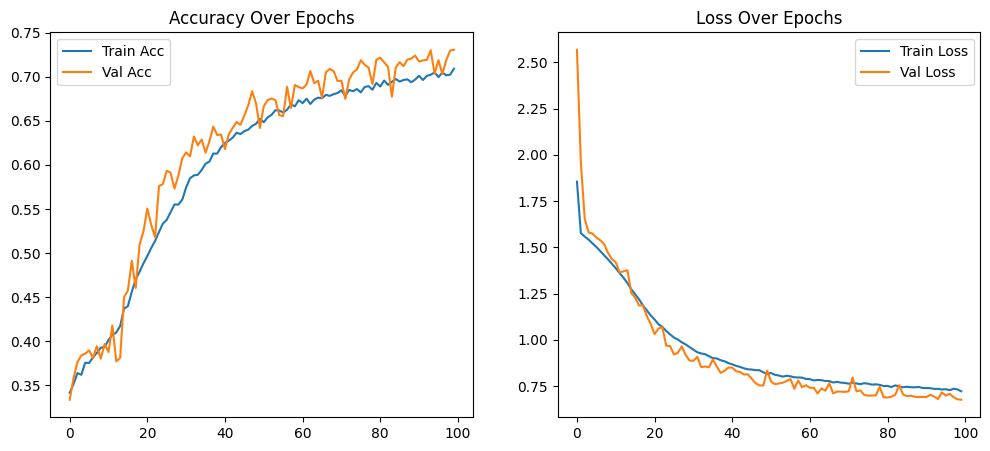

In [ ]:
# ==============================
# 📦 1. IMPORTS
# ==============================
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# ==============================
# ⚙️ 2. SETUP
# ==============================
IMG_SIZE = 48
BATCH_SIZE = 96
EPOCHS = 100

TRAIN_DIR = "images_balanced/train"
VAL_DIR = "images_balanced/validation"

# ==============================
# 🧾 3. LOAD DATASETS
# ==============================
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)

# ==============================
# 🧹 4. NORMALIZATION + PREFETCH
# ==============================
normalization_layer = layers.Rescaling(1./255)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(AUTOTUNE)

# ==============================
# 🔄 5. DATA AUGMENTATION
# ==============================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.15),
])

# ==============================
# 🧩 6. CNN MODEL DEFINITION
# ==============================
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.35),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')
])

# ==============================
# 🧮 7. COMPILE MODEL
# ==============================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ==============================
# 🧠 8. TRAIN MODEL
# ==============================
# early_stop = callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=8,
#     restore_best_weights=True
# )

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    # callbacks=[early_stop]
)

# ==============================
# 📊 9. PLOT TRAINING CURVES
# ==============================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


In [ ]:
# ==============================
# 🧾 10. PRINT FINAL ACCURACY
# ==============================
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"✅ Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"✅ Final Validation Accuracy: {final_val_acc * 100:.2f}%")


✅ Final Training Accuracy: 70.93%
✅ Final Validation Accuracy: 73.08%


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


<Figure size 600x500 with 0 Axes>

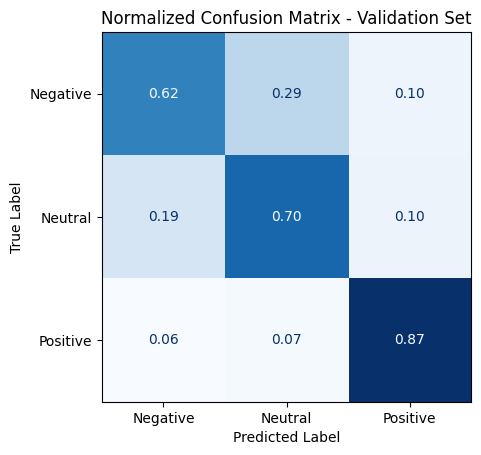

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Get true and predicted labels ---
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = np.argmax(model.predict(val_ds), axis=1)

# --- Define class names (match your folders) ---
class_names = ['Negative', 'Neutral', 'Positive']

# --- Compute normalized confusion matrix ---
cm = confusion_matrix(y_true, y_pred, normalize='true')

# --- Plot normalized confusion matrix ---
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='.2f', colorbar=False)
plt.title("Normalized Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()


In [ ]:
model.save("emotion_model.h5")
